In [1]:
import pandas as pd
import numpy as np
from circuit_reader import *

In [2]:
cd = CircuitData()
cd.filename = "examples/IndCancel_voltage_source_rout_bfebest"
cd.read_results()

In [3]:
cd.data  # time domain data

,time,i(l2),i(la),i(lb),v(0)-v(6),v(0)-v(7),v(1)-v(0),v(2)-v(1),v(3)-v(0),v(4)-v(3),v(6)-v(2),v(101)
0,0.000000e+00,-3.437530e-06,4.707001e-07,-2.715768e-07,-2.341985e-02,1.357884e-05,-9.474289e-17,-3.511802e-02,3.427111e-01,1.358277e-05,5.853787e-02,-0.000124
1,1.000000e-11,3.195725e-07,-3.845278e-08,-6.581612e-09,-7.890765e-05,3.290806e-07,-3.141587e-13,-1.180765e-04,1.152822e-03,-1.153206e-03,1.969841e-04,-3.435204
2,2.000000e-11,-2.067476e-06,2.819688e-07,-1.565589e-07,1.287425e-06,7.827945e-06,-6.283144e-13,8.710336e-06,-7.028704e-05,7.031062e-05,-9.997760e-06,-1.251853
3,3.000000e-11,-5.419521e-07,7.795572e-08,-6.528848e-08,-2.819053e-05,3.264424e-06,-9.424638e-13,-3.945872e-05,3.911768e-04,-3.913068e-04,6.764924e-05,-2.647420
4,4.000000e-11,-3.181603e-07,3.913777e-08,1.424225e-09,1.540195e-05,-7.121126e-08,-1.256604e-12,2.304125e-05,-2.249729e-04,2.250477e-04,-3.844319e-05,-2.849543
...,...,...,...,...,...,...,...,...,...,...,...,...
119996,1.199960e-06,-2.405870e-08,2.975313e-09,1.282180e-11,1.118998e-09,-6.410900e-10,1.256604e-12,1.123297e-09,-1.217002e-08,1.217404e-08,-2.243552e-09,-3.119519
119997,1.199970e-06,-2.365021e-08,2.924715e-09,1.316487e-11,1.149349e-09,-6.582433e-10,9.424638e-13,1.153968e-09,-1.250051e-08,1.250466e-08,-2.304259e-09,-3.119894
119998,1.199980e-06,-2.323036e-08,2.872703e-09,1.353376e-11,1.182000e-09,-6.766881e-10,6.283144e-13,1.186970e-09,-1.285619e-08,1.286044e-08,-2.369598e-09,-3.120280
119999,1.199990e-06,-2.279827e-08,2.819169e-09,1.393101e-11,1.217173e-09,-6.965506e-10,3.141587e-13,1.222530e-09,-1.323949e-08,1.324387e-08,-2.440017e-09,-3.120676


In [4]:
# Cuts a single cycle slice of data
idx_start = 21000
idx_stop = 23000  # 1 cycle: 2000 points (500 MHz)

In [5]:
time_array = cd.data["time"].to_numpy()
voltage_input = cd.data["v(1)-v(0)"].to_numpy()
voltage_output = cd.data["v(0)-v(7)"].to_numpy()
voltage_geometric = cd.data["v(0)-v(6)"].to_numpy() + cd.data["v(2)-v(1)"].to_numpy()  # both of these
voltage_cancel = cd.data["v(6)-v(2)"].to_numpy()
voltage_jj = cd.data["v(3)-v(0)"].to_numpy()  # Josephson junction

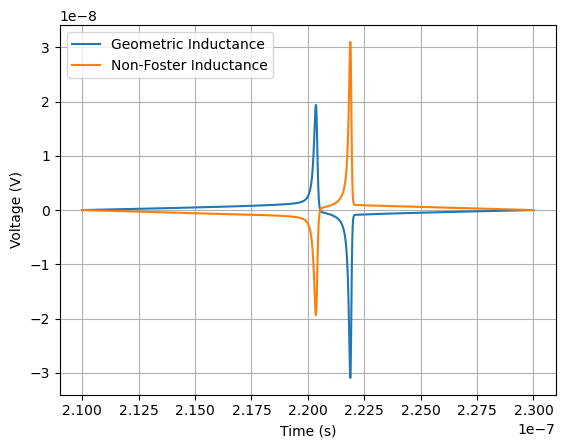

In [6]:
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop], label="Input")  # choose what to plot
# plt.plot(time_array[idx_start:idx_stop], voltage_input[idx_start:idx_stop]*100, label="Input, 100x AMPLIFIED")  # to see structure better
plt.plot(time_array[idx_start:idx_stop], voltage_geometric[idx_start:idx_stop], label="Geometric Inductance")
plt.plot(time_array[idx_start:idx_stop], voltage_cancel[idx_start:idx_stop], label="Non-Foster Inductance")
# plt.plot(time_array[idx_start:idx_stop], voltage_jj[idx_start:idx_stop], label="Across Josephson junction")
# plt.plot(time_array[idx_start:idx_stop], voltage_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.legend()
plt.show()

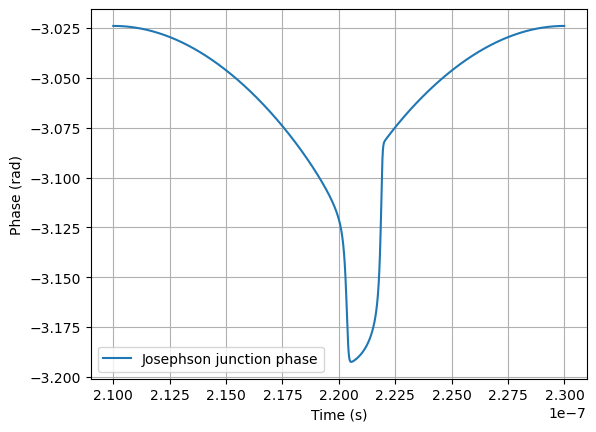

In [7]:
phase_jj = cd.data["v(101)"].to_numpy()  # JJ phase
plt.plot(time_array[idx_start:idx_stop], phase_jj[idx_start:idx_stop], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()

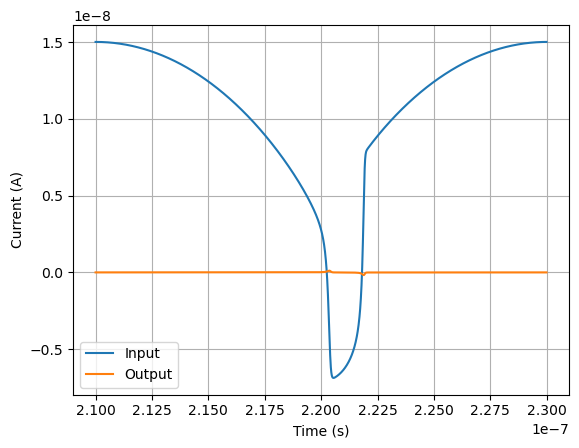

In [8]:
current_input = cd.data["i(la)"].to_numpy()
current_output = cd.data["i(lb)"].to_numpy()
current_jj = cd.data["i(l2)"].to_numpy()
plt.plot(time_array[idx_start:idx_stop], current_input[idx_start:idx_stop], label="Input")
plt.plot(time_array[idx_start:idx_stop], current_output[idx_start:idx_stop], label="Output")
# plt.plot(time_array[idx_start:idx_stop], current_output[idx_start:idx_stop]*100, label="Output, 100x AMPLIFIED")  # to see structure better
# plt.plot(time_array[idx_start:idx_stop], current_jj[idx_start:idx_stop], label="Josephson junction")
# plt.plot([time_array[idx_start], time_array[idx_stop]], [1.09e-6, 1.09e-6], "k--", label="Critical current (top)")
# plt.plot([time_array[idx_start], time_array[idx_stop]], [-1.09e-6, -1.09e-6], "k--", label="Critical current (bottom)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid()
plt.legend()
plt.show()

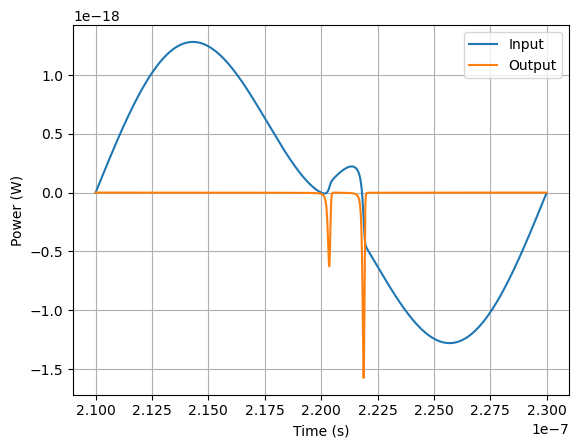

In [9]:
power_input = current_input * voltage_input
power_output = current_output * voltage_output
plt.plot(time_array[idx_start:idx_stop], power_input[idx_start:idx_stop], label="Input")
plt.plot(time_array[idx_start:idx_stop], power_output[idx_start:idx_stop], label="Output")
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.grid()
plt.legend()
plt.show()

In [10]:
def do_fft(time_, data, round_stepsize=True):
    stepsize = time_[1] - time_[0]  # higher maxfreq when data is finer
    # duration = time_[-1] - time_[0]  # better rbw when data is longer
    if round_stepsize:  # only works when stepsize is 10^n
        round_digit = round(-np.log10(time_[1]-time_[0]))
        stepsize = round(stepsize, round_digit)
    npts = len(time_)  # round(duration/stepsize)+1  # must be integer
    
    yf = np.abs(fft(data)[0:npts//2])  # fftshift(fft(y))
    if npts % 2 == 0: xf = fftfreq(npts, stepsize)[0:npts//2]  # why do i need to do this separately???
    else: xf = fftfreq(npts-1, stepsize)[0:npts//2]

    return xf, yf

In [11]:
idx = 20000  # makes rbw clean (indices 20000-120000 only)
freq_input_fft, power_input_fft = do_fft(time_array[idx:], power_input[idx:])
freq_output_fft, power_output_fft = do_fft(time_array[idx:], power_output[idx:])

In [12]:
# Looking at all powers across frequencies, levels are very similar
print(np.sum(power_input_fft), np.sum(power_output_fft))

1.1151639774504402e-13 1.089912237027136e-13


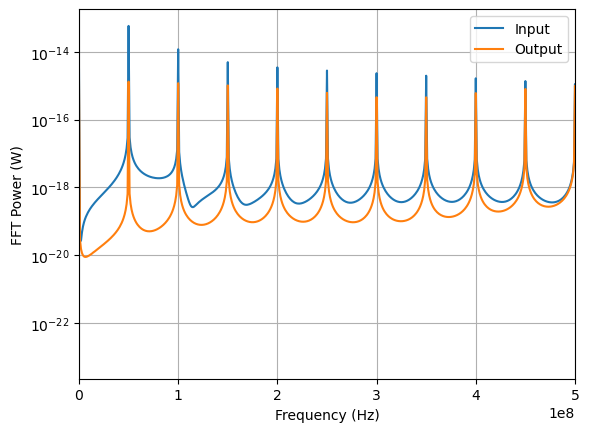

In [13]:
plt.plot(freq_input_fft, power_input_fft, label="Input")  # I think actual fft values need to be divided by npts?
plt.plot(freq_output_fft, power_output_fft, label="Output")
plt.yscale("log")
plt.xlim(0, 5e8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Power (W)")
plt.grid()
plt.legend()
plt.show()

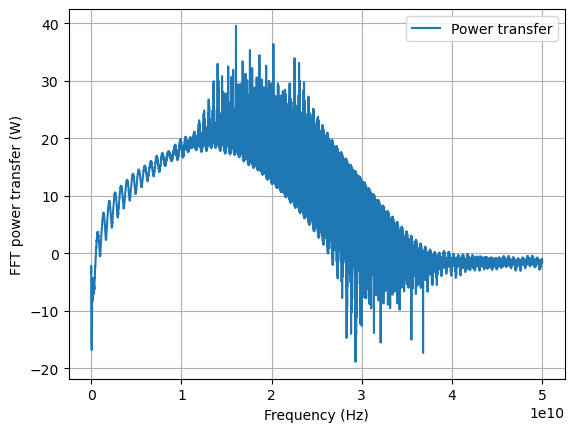

In [14]:
# Miscellaneous: "transfer function"
plt.plot(freq_input_fft, power2dB(power_output_fft/power_input_fft), label="Power transfer")
# plt.xlim(0, 5e8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT power transfer (W)")
plt.grid()
plt.legend()
plt.show()

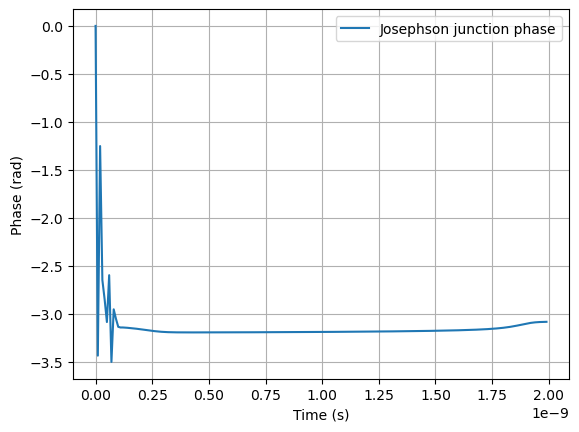

In [15]:
# Miscellaneous: Initial behavior
idx_ringing = 200
plt.plot(time_array[:idx_ringing], phase_jj[:idx_ringing], label="Josephson junction phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")
plt.grid()
plt.legend()
plt.show()